# Exploratory data analysis of Titanic Data set

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

  Variable	Definition	Key

1. survival:	Survival	0 = No, 1 = Yes
2. pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
3. sex:	Sex	
4. Age:	Age in years	
5. sibsp:	# of siblings / spouses aboard the Titanic	
6. parch:	# of parents / children aboard the Titanic	
7. ticket:	Ticket number	
8. fare:	Passenger fare	
9. cabin:	Cabin number	
10. embarked:	Port of Embarkation

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the data and see how it looks like

data=pd.read_csv("Titanic.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Shape of the data

data.shape

(891, 12)

In [4]:
#List of Coloums

print(list(data.columns), end=" ")

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 

In [5]:
# Check NA values in data set

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Data Type of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Drop Irrelevant columns from data

irrelevant_col=["Name", 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

data.drop(irrelevant_col, axis=1, inplace=True)


In [8]:
#Basic Statistics of data

data.describe(include="all")

,PassengerId,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,891,714.000000,891.000000
unique,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,male,NaN,NaN
freq,NaN,NaN,NaN,577,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,29.699118,32.204208
std,257.353842,0.486592,0.836071,NaN,14.526497,49.693429
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000
25%,223.500000,0.000000,2.000000,NaN,20.125000,7.910400
50%,446.000000,0.000000,3.000000,NaN,28.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,38.000000,31.000000


Observation:

    1. Total 891 passenger details are provided
    2. Minimum age is, almost half year infant and maximum age is 80 year old
    3. Minimum ticket fare is 0 and maximum ticket fare is 512

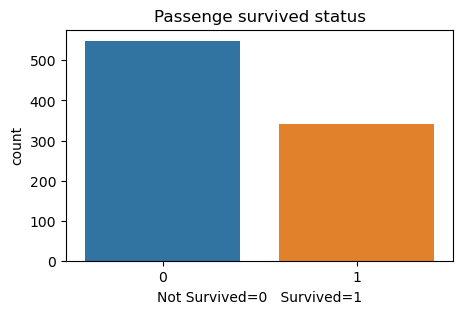

In [9]:
# Countplot of Survived data

plt.figure(figsize=(5,3))
sns.countplot(data, x= data["Survived"])
plt.xlabel("Not Survived=0   Survived=1")
plt.title("Passenge survived status")
plt.show()

In [10]:
#Calculation of % of survived or not survived passengers

data_sur = data.groupby("Survived").agg(Total_count=("Sex", "count")).reset_index()
data_sur["Percentage"]= round(data_sur["Total_count"]/np.sum(data_sur["Total_count"])*100,2)
data_sur

,Survived,Total_count,Percentage
0,0,549,61.62
1,1,342,38.38


Observations:

1. 61.62% passengers were not survived
2. 38.38% passengers only survived

## UNIVARIATE ANALYSIS

In univariate analysis, we will analyse the survived status oa passenger by the following variables:
    
    1. Gender of passenger
    2. Age of passenger
    3. Ticket fare
    4. Passenger class
    

### 1. Survived status Analysis-Gender wise

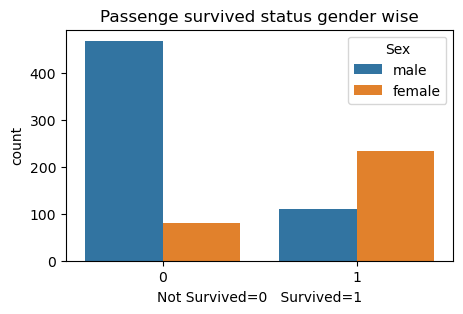

In [11]:
#Countplot of survived data with respect to gender of the passenger

plt.figure(figsize=(5,3))
sns.countplot(data, x= data["Survived"], hue="Sex")
plt.xlabel("Not Survived=0   Survived=1")
plt.title("Passenge survived status gender wise")
plt.show()

In [14]:
#Calculations of % female and male passenger who survived and not survived


data1=data.groupby(["Survived", "Sex"]).agg(Count_Sex=("Sex","count")).reset_index()

data2=data.groupby(["Survived"]).agg(Tot_Count_Sur=("Survived","count")).reset_index()


survived_data=pd.merge(data1,data2, how="inner", on="Survived")

survived_data["Percentage"]=round(survived_data["Count_Sex"]/survived_data["Tot_Count_Sur"]*100,2)
survived_data

,Survived,Sex,Count_Sex,Tot_Count_Sur,Percentage
0,0,female,81,549,14.75
1,0,male,468,549,85.25
2,1,female,233,342,68.13
3,1,male,109,342,31.87


In [18]:
data3=data.groupby("Sex").agg(Count_Sex=("Sex","count")).reset_index()
data3["Percentage"]=round(data3["Count_Sex"]/891*100,2)

data3

,Sex,Count_Sex,Percentage
0,female,314,35.24
1,male,577,64.76


Observations:

1. Total passenger: 35% were female and 65% were male
2. Passengers who were not survived; 85.25% male and 14.75% female
3. Passengers who were survived; 68.13% female and 31.87% Male
    

### 2.Survived status Analysis-Age wise

In [19]:
data4=data[["Survived", "Age", "Sex"]]

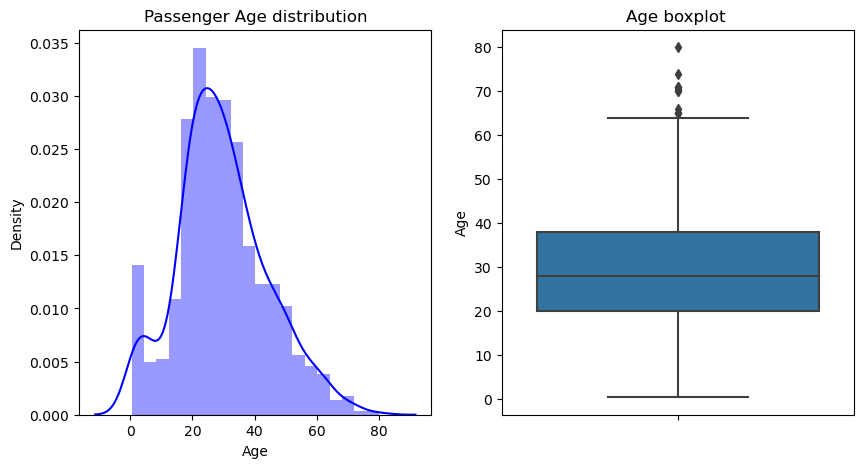

In [20]:
#Distribution Plot

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(data["Age"], color="b")
plt.title("Passenger Age distribution")

plt.subplot(122)
sns.boxplot(y=data['Age'])
plt.title('Age boxplot ')
plt.show()

Observation:
    
    1. As per the box plot, we identified some outliers in the age column

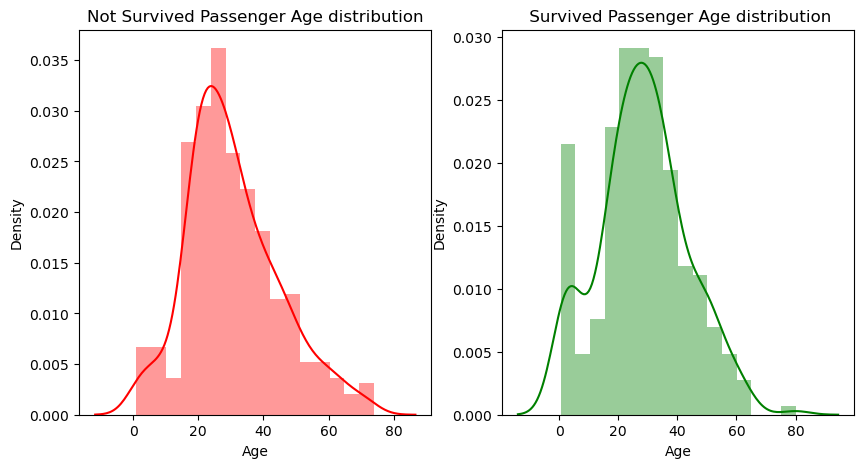

In [21]:
#Distribution Plot
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(data.loc[data["Survived"]==0, "Age"], color="r")
plt.title("Not Survived Passenger Age distribution")


plt.subplot(122)
sns.distplot(data.loc[data["Survived"]==1, "Age"], color="g")
plt.title(" Survived Passenger Age distribution")
plt.show()


In [22]:
#Calculations: Defined the category of the passenger age wise.
#Below category is obtained for the easyness of the analysis

def category(age): 
    if age<=5:
        x="infant_cat"
    elif age>5 and age<=18:
        x="child_cat"
    elif age> 18 and age<=40:
        x="adult_cat"
    elif age> 40 and age<=65:
        x="middleage_cat"
    elif age>65:
        x="oldage_cat"
    else:
        x="Age Not correctly defined"
    return x

data4["Age_Category"]=data4["Age"].apply(lambda x: category(x))

In [25]:
#Drop na in age column 
data4.dropna(inplace=True)

#Convert the age into integer 
data4["Age"]=data4["Age"].apply(lambda x: int(x))

data4

,Survived,Age,Sex,Age_Category
0,0,22,male,adult_cat
1,1,38,female,adult_cat
2,1,26,female,adult_cat
3,1,35,female,adult_cat
4,0,35,male,adult_cat
...,...,...,...,...
885,0,39,female,adult_cat
886,0,27,male,adult_cat
887,1,19,female,adult_cat
889,1,26,male,adult_cat


In [27]:
#Age category wise survived or not survived passenger

data5=data4.groupby(["Age_Category", "Survived"]).agg(Count_survived=("Survived", "count")).reset_index()
data5

,Age_Category,Survived,Count_survived
0,adult_cat,0,260
1,adult_cat,1,165
2,child_cat,0,56
3,child_cat,1,39
4,infant_cat,0,13
5,infant_cat,1,31
6,middleage_cat,0,88
7,middleage_cat,1,54
8,oldage_cat,0,7
9,oldage_cat,1,1


In [29]:
#Age category wise total passenger

data6=data4.groupby(["Age_Category"]).agg(Total_Count_sur=("Survived", "count")).reset_index()
data6                                                   

,Age_Category,Total_Count_sur
0,adult_cat,425
1,child_cat,95
2,infant_cat,44
3,middleage_cat,142
4,oldage_cat,8


In [30]:
#Calculation of % of passenger age category wise 
data6["Cat_Percentage"]= round(data6["Total_Count_sur"]/(np.sum(data6["Total_Count_sur"]))*100,2)
data6

,Age_Category,Total_Count_sur,Cat_Percentage
0,adult_cat,425,59.52
1,child_cat,95,13.31
2,infant_cat,44,6.16
3,middleage_cat,142,19.89
4,oldage_cat,8,1.12


In [32]:
#Calculation of % of passenger age category wise survived or not survived

Survived_data2=pd.merge(data5,data6, how="inner", on="Age_Category")
Survived_data2["Percentage"]=round(Survived_data2["Count_survived"]/Survived_data2["Total_Count_sur"]*100,2)
Survived_data2

,Age_Category,Survived,Count_survived,Total_Count_sur,Cat_Percentage,Percentage
0,adult_cat,0,260,425,59.52,61.18
1,adult_cat,1,165,425,59.52,38.82
2,child_cat,0,56,95,13.31,58.95
3,child_cat,1,39,95,13.31,41.05
4,infant_cat,0,13,44,6.16,29.55
5,infant_cat,1,31,44,6.16,70.45
6,middleage_cat,0,88,142,19.89,61.97
7,middleage_cat,1,54,142,19.89,38.03
8,oldage_cat,0,7,8,1.12,87.50
9,oldage_cat,1,1,8,1.12,12.50


Observation on Age-category wise:
    
    1. Infant Category: 70% survived and 30% not survived
    2. Child Category:  41% survived and 59% not survived
    3. Adult category:  38% survived and 61% not survived
    4. MiddleAge Category: 38% survived and 61% not survived
    5. Old Age Category: 12% survived and 87% not survived

### 3.Survived status Analysis-Fare wise

In [33]:
data7 = data[["Survived", "Fare", "Sex", "Pclass", "Age"]]

In [34]:
data7.head()

,Survived,Fare,Sex,Pclass,Age
0,0,7.2500,male,3,22.0
1,1,71.2833,female,1,38.0
2,1,7.9250,female,3,26.0
3,1,53.1000,female,1,35.0
4,0,8.0500,male,3,35.0


In [35]:
#Basic information about tha data

data7["Fare"].describe(include="All")

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

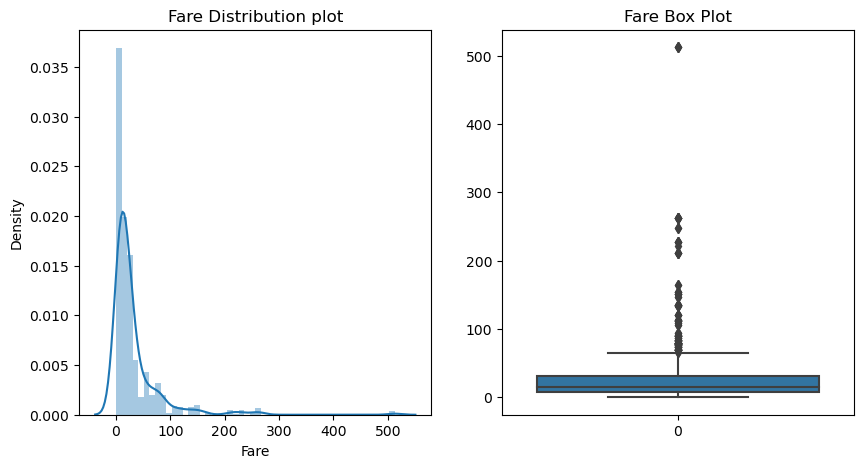

In [36]:
#Fare Distribution Plot

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(data7["Fare"])
plt.title("Fare Distribution plot")

plt.subplot(122)
sns.boxplot(data7["Fare"])
plt.title("Fare Box Plot")

plt.show()

Observations:
    
    1. The distribution plot is positively skewed
    2. 50% ticket fare were below or equal to 14.45
    3.75% of ticket fare were below or equal to 31
    4. The maximum fare is 512 and minimum fare is 0

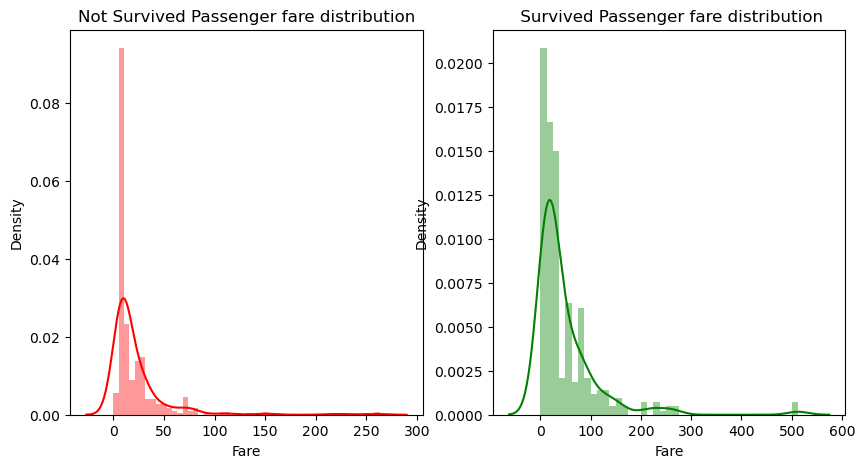

In [37]:
#Distribution Plot of ticket fare with survival status
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(data.loc[data["Survived"]==0, "Fare"], color="r")
plt.title("Not Survived Passenger fare distribution")


plt.subplot(122)
sns.distplot(data.loc[data["Survived"]==1, "Fare"], color="g")
plt.title(" Survived Passenger fare distribution")
plt.show()


In [38]:
print(np.percentile((data.loc[data["Survived"]==0, "Fare"]),90))


46.9


Observations:
    
    1. The passengers who were not survived, 90% passengers ticket fare is below 47


In [39]:
# Defined financial status category of all passengers

def fin_status(ticket_fare):
    
    if ticket_fare>=0 and ticket_fare<=8:
        status= "Very_Poor_Cat"
    elif ticket_fare>8 and ticket_fare<=15:
        status = "Poor_Cat"
    elif ticket_fare>15 and ticket_fare<=31:
        status= "Lower_Middle_Cat"
    elif ticket_fare>31 and ticket_fare<=100:
        status = "Middle_Cat"
    elif ticket_fare>100 and ticket_fare<=300:
        status="Upper_cat"
    elif ticket_fare>300:
        status= "Elite_cat"
    else:
        status="not defined category"
        
    return status
        
data7["Status_cate"]=data7["Fare"].apply(lambda x: fin_status(x))
    

In [40]:
data7.head()

,Survived,Fare,Sex,Pclass,Age,Status_cate
0,0,7.2500,male,3,22.0,Very_Poor_Cat
1,1,71.2833,female,1,38.0,Middle_Cat
2,1,7.9250,female,3,26.0,Very_Poor_Cat
3,1,53.1000,female,1,35.0,Middle_Cat
4,0,8.0500,male,3,35.0,Poor_Cat


In [41]:
#Reorder the status category(Elite to Poor)

df_reorder=pd.DataFrame()
df_reorder["Status_cate"]=["Elite_cat", "Upper_cat", "Middle_Cat", "Lower_Middle_Cat","Poor_Cat", "Very_Poor_Cat"]
df_reorder["Rank"]=[1,2,3,4,5,6]
df_reorder

,Status_cate,Rank
0,Elite_cat,1
1,Upper_cat,2
2,Middle_Cat,3
3,Lower_Middle_Cat,4
4,Poor_Cat,5
5,Very_Poor_Cat,6


In [45]:
data8=data7.groupby(["Status_cate"]).agg(Mean_fare=("Fare", "mean"), Total_passenger=("Survived","count")).reset_index()
data8=pd.merge(data8,df_reorder, how="inner", on="Status_cate")
data8.sort_values(by="Rank", inplace=True)
data8

,Status_cate,Mean_fare,Total_passenger,Rank
0,Elite_cat,512.329200,3,1
4,Upper_cat,167.515078,50,2
2,Middle_Cat,57.832817,169,3
1,Lower_Middle_Cat,23.471523,211,4
3,Poor_Cat,10.800461,217,5
5,Very_Poor_Cat,7.100707,241,6


In [46]:
data9=data7.groupby(["Status_cate","Survived"]).agg(Total_survived=("Survived","count")).reset_index()
data9

,Status_cate,Survived,Total_survived
0,Elite_cat,1,3
1,Lower_Middle_Cat,0,112
2,Lower_Middle_Cat,1,99
3,Middle_Cat,0,79
4,Middle_Cat,1,90
5,Poor_Cat,0,155
6,Poor_Cat,1,62
7,Upper_cat,0,14
8,Upper_cat,1,36
9,Very_Poor_Cat,0,189


In [47]:
#calculation of the % of passengers who survived or did not survive is categorized based on financial status category

data10=pd.merge(data8,data9,how="inner",on="Status_cate")
data10["Survived_percentage"]=round(data10["Total_survived"]/data10["Total_passenger"]*100,2)
data10.drop("Rank", inplace=True,axis=1)
data10

,Status_cate,Mean_fare,Total_passenger,Survived,Total_survived,Survived_percentage
0,Elite_cat,512.329200,3,1,3,100.00
1,Upper_cat,167.515078,50,0,14,28.00
2,Upper_cat,167.515078,50,1,36,72.00
3,Middle_Cat,57.832817,169,0,79,46.75
4,Middle_Cat,57.832817,169,1,90,53.25
5,Lower_Middle_Cat,23.471523,211,0,112,53.08
6,Lower_Middle_Cat,23.471523,211,1,99,46.92
7,Poor_Cat,10.800461,217,0,155,71.43
8,Poor_Cat,10.800461,217,1,62,28.57
9,Very_Poor_Cat,7.100707,241,0,189,78.42


observations:
    
    1.Elite Category: 100% passenger survived
    2.Upper Category: 72% passenger survived and 28% not survived
    3.Middle Category: 53% passenger survived and 46% not survived
    4.Lower Middle cat: 46% passenger survived and 53% not survived
    5.Poor category: 28% passenger survived and 71% not survived
    6.Very poor category: 22% passenger survived and 78% not survived

### 4.Survived status analysis-Passenger Class wise

In [48]:
pclass_data=data[["Survived", "Pclass"]]

In [49]:
pclass_data.describe()

,Survived,Pclass
count,891.000000,891.000000
mean,0.383838,2.308642
std,0.486592,0.836071
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,1.000000,3.000000
max,1.000000,3.000000


Observation:
    
    1. As Pclass is categorical data , the above parameter cannot draw any inferences

Text(0.5, 1.0, 'Class wise survival status')

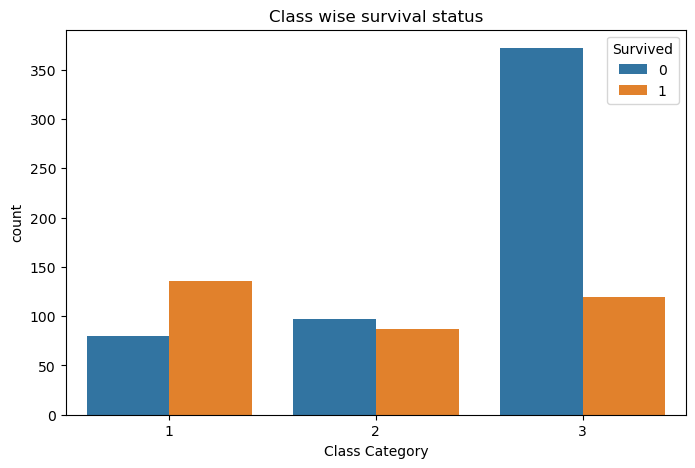

In [180]:
#Distribution Plot with Passenger class status

plt.figure(figsize=(8,5))

sns.countplot(pclass_data, x= pclass_data["Pclass"], hue= "Survived")
plt.xlabel("Class Category")
plt.title("Class wise survival status")

In [50]:
#Passenger class category wise Total passenger survived or not survived 

pclass_data2 = pclass_data.groupby(["Pclass","Survived"]).agg(Survived_count=("Survived","count")).reset_index()
pclass_data2

,Pclass,Survived,Survived_count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [51]:
#Passenger class category wise Total passenger survived

pclass_data3= pclass_data.groupby(["Pclass"]).agg(Total_sur_count=("Survived","count")).reset_index()
pclass_data3

,Pclass,Total_sur_count
0,1,216
1,2,184
2,3,491


In [52]:
#Calculation of % of passenger survived or did not survived based on passenger class category

pclass_data4 = pd.merge(pclass_data2,pclass_data3, how="inner", on="Pclass")
pclass_data4["Percentage"]= round((pclass_data4["Survived_count"]/pclass_data4["Total_sur_count"]*100),2)
pclass_data4

,Pclass,Survived,Survived_count,Total_sur_count,Percentage
0,1,0,80,216,37.04
1,1,1,136,216,62.96
2,2,0,97,184,52.72
3,2,1,87,184,47.28
4,3,0,372,491,75.76
5,3,1,119,491,24.24


Observations:
    
    1.Class 1 Cate: 63% survived and 37% not survived
    2.Class 2 cate: 47% survived and 525 not survived
    3.Class 3 cate: 24% survived and 76% not survived

# BIVARIATE ANALYSIS

In [53]:
data11=data[["Survived","Fare","Age", "Sex","Pclass"]]

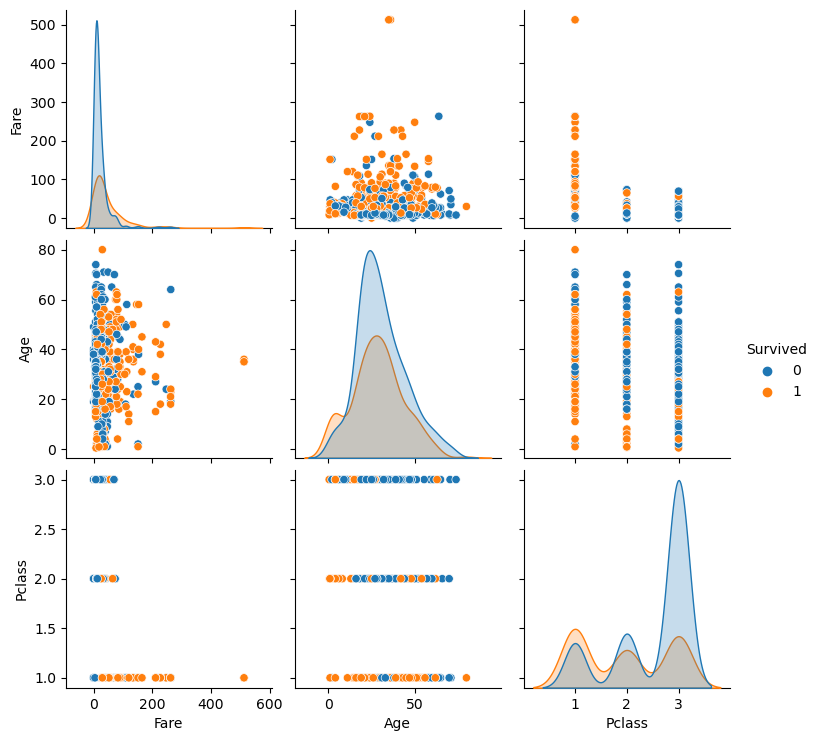

In [54]:
#Pairplot of the passenger data

sns.pairplot(data11, hue='Survived')
plt.show()

              Fare    Pclass       Age  Survived
Fare      1.000000 -0.549500  0.096067  0.257307
Pclass   -0.549500  1.000000 -0.369226 -0.338481
Age       0.096067 -0.369226  1.000000 -0.077221
Survived  0.257307 -0.338481 -0.077221  1.000000


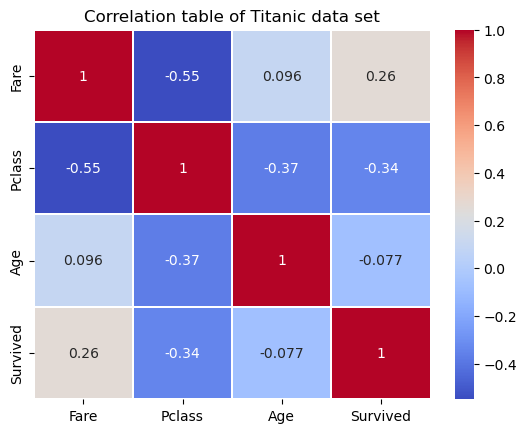

In [55]:
#Correlation matrix of the data

print(data[["Fare", "Pclass", "Age","Survived"]].corr())
sns.heatmap(data[["Fare", "Pclass", "Age","Survived"]].corr(), cmap='coolwarm', annot=True, linecolor='white', linewidths=0.25)
plt.title("Correlation table of Titanic data set")
plt.show()

Observations:

1. There is less correlation between either of the variables
2. Pclass and Fare are showing 55% correlation with each other


### Conclusion:
    
1.Comparing all the plots, calculations and observations, there is a fair relationship between age, sex, and ticket fare with the survival status of the passenger.
2. We will use these three variables for the model building to forcast the passenger survival status